In [205]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [206]:
matplotlib.__version__

'3.7.1'

In [207]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [208]:
#Set path
path = r'/Users/corinagugulus/Achievement 6/'

In [209]:
df = pd.read_csv(os.path.join(path, 'Prepared Data','df_profile.csv'), index_col = False, low_memory = False)

In [210]:
#Dropping ID, Currency, Price_Display, Price_Type, Address, Time columns because they are not needed for analysis
df.drop(['ID_Python','ID','Currency', 'Price_Display', 'Price_Type', 'Address', 'Time', 'Cityname'], axis = 1, inplace = True)

In [211]:
df.head()

,Amenities,Bathrooms,Bedrooms,Fee,Has_Photo,Pets_Allowed,Price,Square_Feet,State,Latitude,Longitude,Source
0,Garbage Disposal Pool,2,0,NaN,Thumbnail,NaN,1,0,NaN,NaN,NaN,NaN
1,please do not ask On site full service propert...,2,0,NaN,Yes,NaN,1,0,NaN,NaN,NaN,NaN
2,one bathrooms on 1 1/2 floors. The loft bedroo...,1,0,NaN,No,NaN,1,0,NaN,NaN,NaN,NaN
3,ParkingPool,1,0,NaN,No,NaN,1,0,NaN,NaN,NaN,NaN
4,Two BR One BA;Rare find beautiful update 2BD/o...,1,2,NaN,Yes,NaN,1,0,NaN,NaN,NaN,NaN


In [212]:
df.shape

(99117, 12)

In [213]:
df.columns

Index(['Amenities', 'Bathrooms', 'Bedrooms', 'Fee', 'Has_Photo',
       'Pets_Allowed', 'Price', 'Square_Feet', 'State', 'Latitude',
       'Longitude', 'Source'],
      dtype='object')

In [214]:
df.dtypes

Amenities        object
Bathrooms         int64
Bedrooms          int64
Fee              object
Has_Photo        object
Pets_Allowed     object
Price             int64
Square_Feet       int64
State            object
Latitude        float64
Longitude       float64
Source           object
dtype: object

In [215]:
df['Fee'] = df['Fee'].astype('bool')
df['Has_Photo'] = df['Has_Photo'].astype('bool')
df['Pets_Allowed'] = df['Pets_Allowed'].astype('bool')

In [216]:
df['State'] = df['State'].astype('bool')
df['Source'] = df['Source'].astype('bool')
df['Amenities'] = df['Amenities'].astype('bool')

In [217]:
print(df['Fee'].dtypes)
print(df['Has_Photo'].dtypes)
print(df['Pets_Allowed'].dtypes)
print(df['State'].dtypes)
print(df['Source'].dtypes)
print(df['Amenities'].dtypes)

bool
bool
bool
bool
bool
bool


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99117 entries, 0 to 99116
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Amenities     99117 non-null  bool   
 1   Bathrooms     99117 non-null  int64  
 2   Bedrooms      99117 non-null  int64  
 3   Fee           99117 non-null  bool   
 4   Has_Photo     99117 non-null  bool   
 5   Pets_Allowed  99117 non-null  bool   
 6   Price         99117 non-null  int64  
 7   Square_Feet   99117 non-null  int64  
 8   State         99117 non-null  bool   
 9   Latitude      303 non-null    float64
 10  Longitude     1132 non-null   float64
 11  Source        99117 non-null  bool   
dtypes: bool(6), float64(2), int64(4)
memory usage: 5.1 MB


In [219]:
#Checking for mixed-typed values

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

In [220]:
# Check for missing values
df.isnull().sum() 


Amenities           0
Bathrooms           0
Bedrooms            0
Fee                 0
Has_Photo           0
Pets_Allowed        0
Price               0
Square_Feet         0
State               0
Latitude        98814
Longitude       97985
Source              0
dtype: int64

In [221]:
# Find duplicates
df_dups = df[df.duplicated()]

In [222]:
df_dups.shape 

(96838, 12)

In [223]:
df.corr()

,Amenities,Bathrooms,Bedrooms,Fee,Has_Photo,Pets_Allowed,Price,Square_Feet,State,Latitude,Longitude,Source
Amenities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathrooms,NaN,1.000000,0.855188,NaN,NaN,NaN,0.601212,0.274245,NaN,0.108784,0.057629,NaN
Bedrooms,NaN,0.855188,1.000000,NaN,NaN,NaN,0.583293,0.271696,NaN,0.060214,0.024827,NaN
Fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has_Photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pets_Allowed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,0.601212,0.583293,NaN,NaN,NaN,1.000000,0.210735,NaN,-0.102251,-0.085297,NaN
Square_Feet,NaN,0.274245,0.271696,NaN,NaN,NaN,0.210735,1.000000,NaN,0.079725,0.085551,NaN
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,NaN,0.108784,0.060214,NaN,NaN,NaN,-0.102251,0.079725,NaN,1.000000,-0.110638,NaN


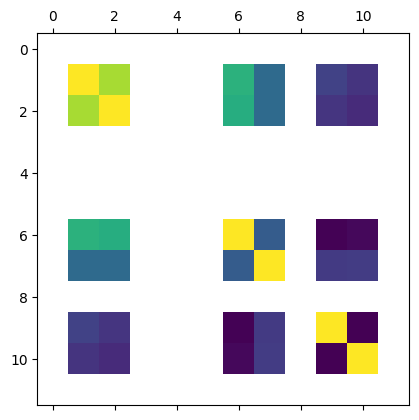

In [224]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

In [225]:
#current dir
cwd = os.getcwd()
cwd

'/Users/corinagugulus'

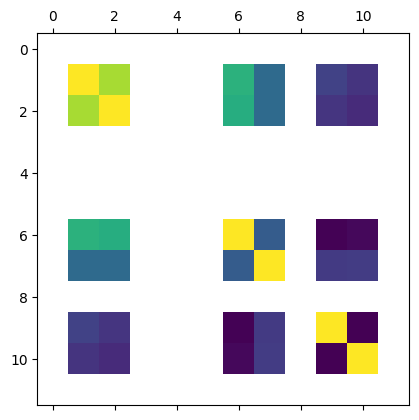

In [226]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

Text(0.5, 1.0, 'Correlation Matrix')

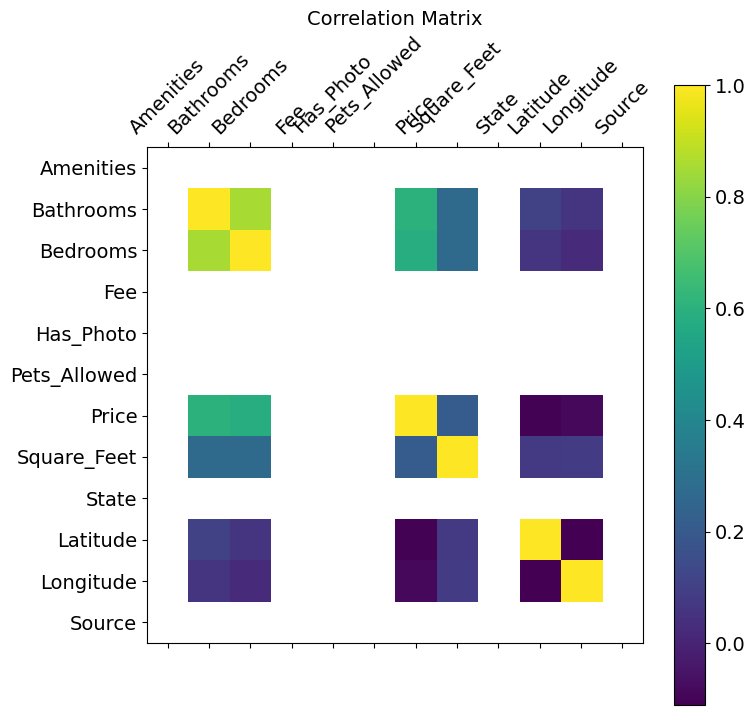

In [227]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Create a correlation heatmap using seaborn:

In [228]:
df.columns

Index(['Amenities', 'Bathrooms', 'Bedrooms', 'Fee', 'Has_Photo',
       'Pets_Allowed', 'Price', 'Square_Feet', 'State', 'Latitude',
       'Longitude', 'Source'],
      dtype='object')

In [229]:
# Create a subset excluding the "Amenities", "Fee", "Has_Photo", "Pets_Allowed", "State", "Source" columns

sub = df[['Bathrooms', 'Bedrooms', 'Price', 'Latitude','Longitude']]

In [230]:
sub

,Bathrooms,Bedrooms,Price,Latitude,Longitude
0,2,0,1,NaN,NaN
1,2,0,1,NaN,NaN
2,1,0,1,NaN,NaN
3,1,0,1,NaN,NaN
4,1,2,1,NaN,NaN
...,...,...,...,...,...
99112,0,0,0,NaN,NaN
99113,0,0,0,NaN,NaN
99114,0,0,0,NaN,NaN
99115,0,0,0,NaN,NaN


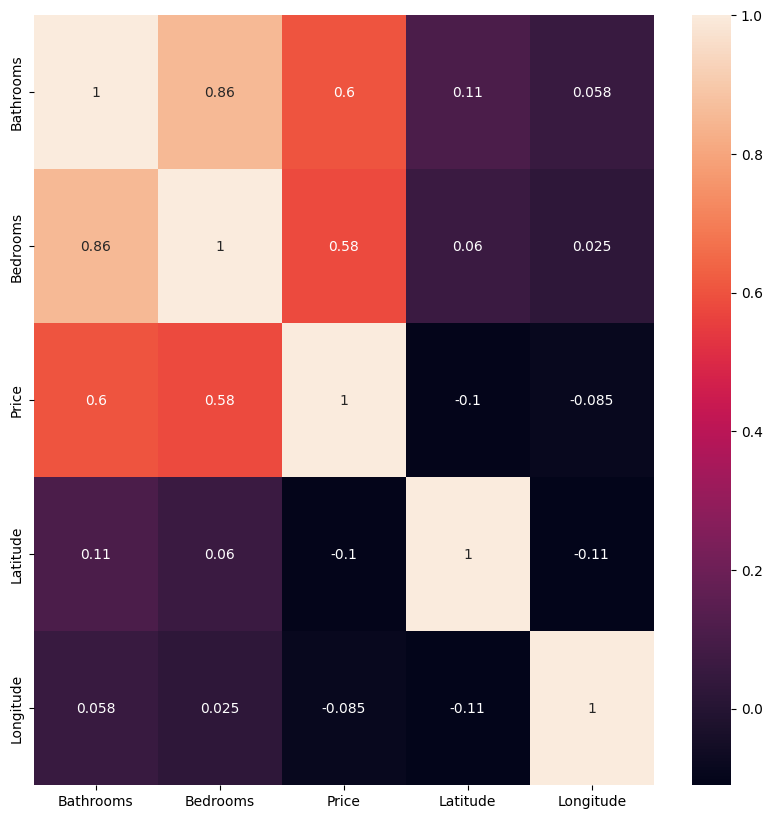

In [231]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [232]:
#Strong relationship btw Bathrooms and Bedrooms, btw Bathrooms and Price; btw Bedrooms and Bathrooms; btw Bedrooms and Price; 
#Weak relationship btw Bathroom and Square_Feet, Bedroom and Square_Feet, Square_Feet and Price.
#Bathrooms and Bedrooms have the most impact on the price of real estate.
#Strong negative correlation btw Latitude, Longitude and Price. 

#Scatterplots

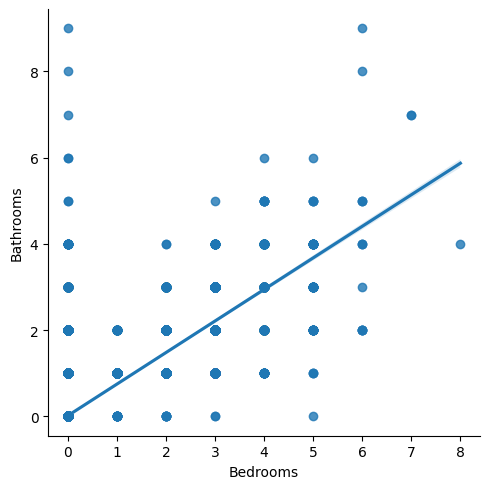

In [233]:
# Create a scatterplot for the "Bathrooms" and "Bedrooms" columns in seaborn

sns.lmplot(x = 'Bedrooms', y = 'Bathrooms', data = df)

In [234]:
#The trend is upward: As the number of bedrooms goes up then the number of bathrooms goes up too but there are a few outliers. There is a positive relationship but not that strong.  


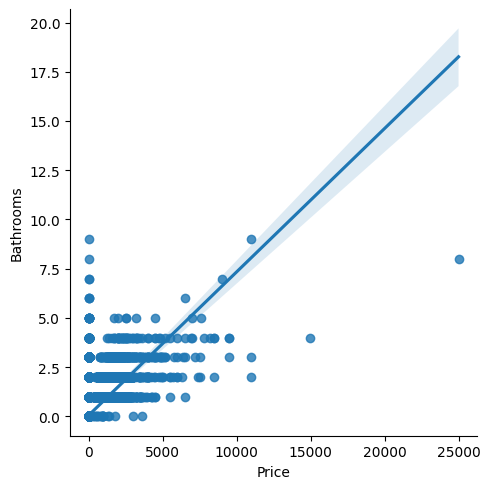

In [235]:
# Create a scatterplot for the "Bathrooms" and "Price" columns in seaborn

sns.lmplot(x = 'Price', y = 'Bathrooms', data = df)

In [236]:
#There is a positive upward trend bw these two variables but with a few outliers. Besides that, the zero price stands for the rows without information about the price. The scatterplot shows that the price goes up as the number of bathrooms goes up too. 

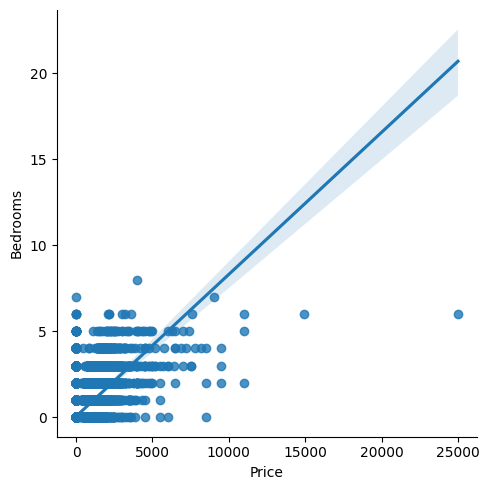

In [237]:
# Create a scatterplot for the "Bedrooms" and "Price" columns in seaborn

sns.lmplot(x = 'Price', y = 'Bedrooms', data = df)

In [238]:
#The scatterplot above shows that the price goes up as the number of bedrooms goes up and this ties into the other scatterplot that shows the relationship between bathrooms and price but also the one about the bathrooms and bedrooms. There are a few outliers though. 

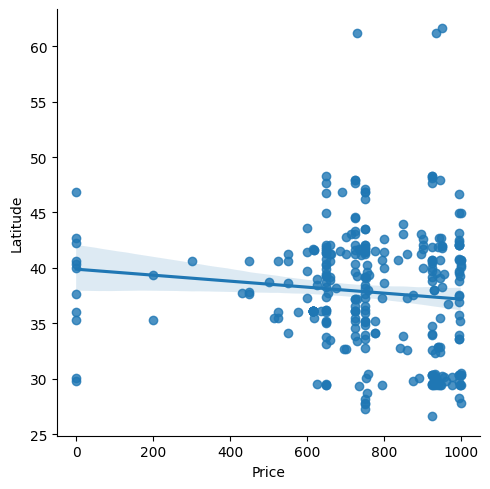

In [239]:
# Create a scatterplot for the "Latitude" and "Price" columns in seaborn - the strong negative correlation

sns.lmplot(x = 'Price', y = 'Latitude', data = df)

In [240]:
#The scatterplot shows that although there is a negative association bw the two variables the association is not that strong since the points are not clustered together around the trend line. The price is higher in a certain latitude point which I suspect it's an urban one.  

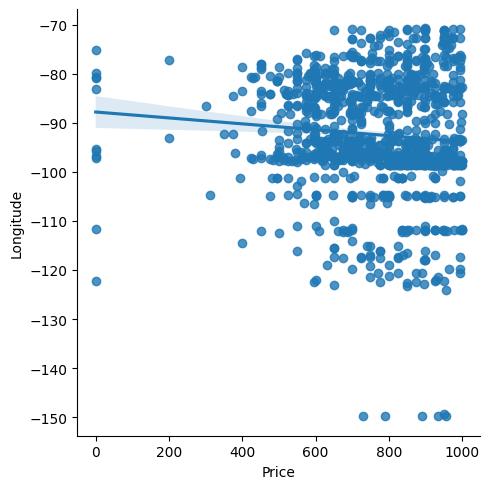

In [241]:
# Create a scatterplot for the "Longitude" and "Price" columns in seaborn - the strong negative correlation

sns.lmplot(x = 'Price', y = 'Longitude', data = df)

In [242]:
#There is a moderate negative assocciation between Price and Longitude. 

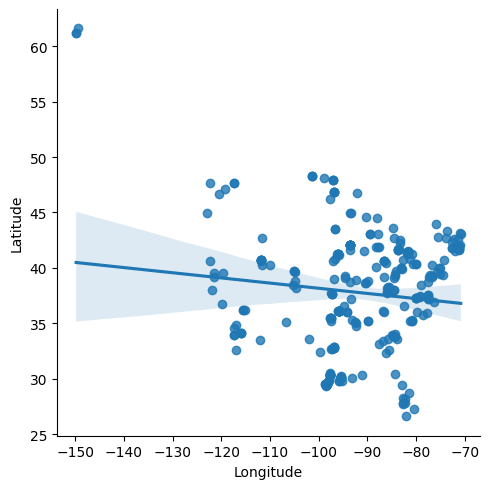

In [243]:
# Create a scatterplot for the "Longitude" and "Latitude" columns in seaborn - the negative correlation

sns.lmplot(x = 'Longitude', y = 'Latitude', data = df)

In [244]:
#There are some outliers and the trend goes down with a moderate to weak negative correlation bw the two variables. 

#Pair Plots

In [281]:
# Tried to create pair plots for the entire dataframe but it didn't work due to the categorical variables So
# I kept only the numerical variables 

sub_2 = sub[['Bathrooms', 'Bedrooms', 'Longitude', 'Latitude', 'Price']]

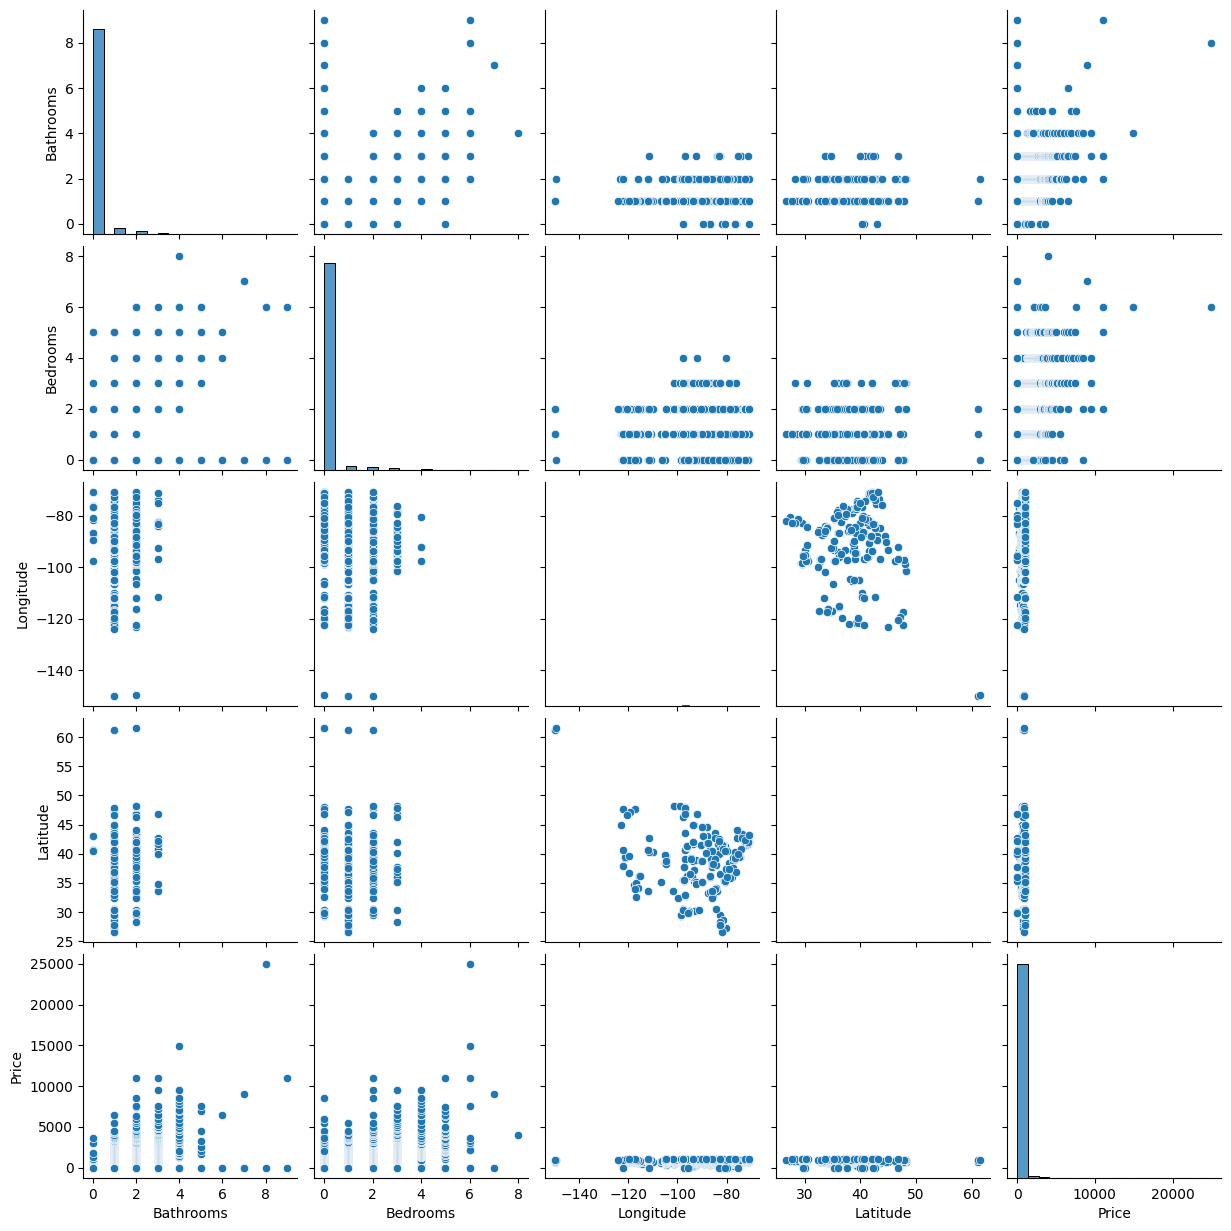

In [254]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [258]:
#There is a correlation between bathrooms, bedrooms and price and this will be further investigated. 

#Categorical Plots:
#Creating a categorical variable that splits the "Price" column into categories

<Axes: xlabel='Price', ylabel='Count'>

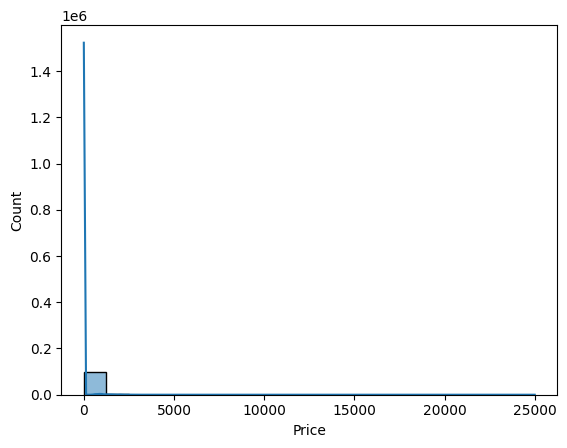

In [269]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Price'], bins = 20, kde = True)

In [270]:
df.loc[df['Price'] < 20, 'Price category'] = 'Low price'

In [271]:
df.loc[(df['Price'] >= 20) & (df['Price'] < 50), 'Price category'] = 'Middle price'

In [272]:
df.loc[df['Price'] >= 50, 'Price category'] = 'High price'

In [273]:
df['Price category'].value_counts(dropna = False)

Price category
Low price     96315
High price     2802
Name: count, dtype: int64

In [274]:
df.columns

Index(['Amenities', 'Bathrooms', 'Bedrooms', 'Fee', 'Has_Photo',
       'Pets_Allowed', 'Price', 'Square_Feet', 'State', 'Latitude',
       'Longitude', 'Source', 'Price category'],
      dtype='object')

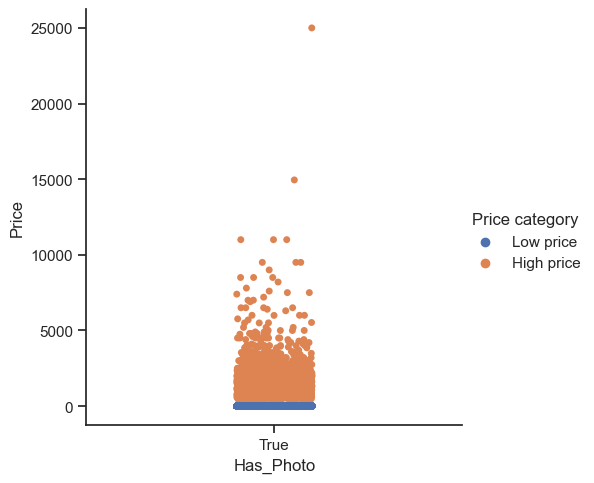

In [284]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Has_Photo", y="Price", hue="Price category", data=df)

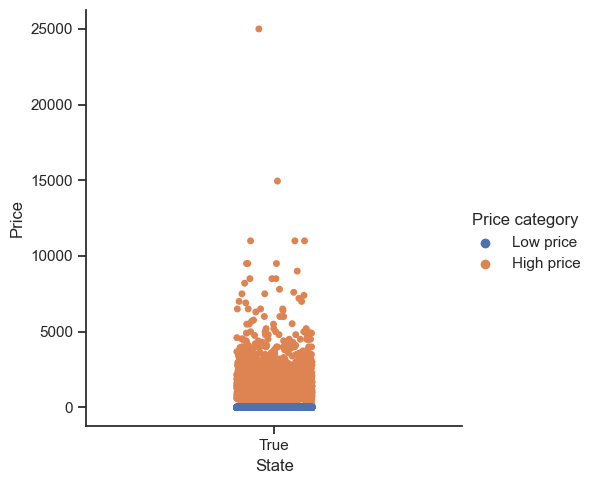

In [286]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="State", y="Price", hue="Price category", data=df)

In [285]:
# fig = g.get_figure()
g.savefig("out.png") 

# The image will be saved in the working directory. 

1. How the rental price varies across the states? The vast majority of higher prices are in the urban areas but this needs further investigation to identify exactly which are the states. 
2. Where are the cheapest rentals? This needs further investigation to identify the actual states but from the visuals so far the cheapest houses are at the longitude between -80 and -90 and latitude 40.
3. What type of rentals are the most popular? It looks like 3 and 4 bedrooms.
4. What is the distribution of property sizes? This question couldn't be answered yet. 

New Questions:
How the amenities, has photo and pets allowed variables influence the price?
What are the most popular advertising rental sites? Is there a relationship between these ones and price or state?

Define any hypotheses that you can at this point. You’ll be testing these later on.

If the houses/apartments are advertised on the most popular site then the chances of getting rented are higher.
Rentals in which the pets are allowed are more popular.
If the square footage is larger then the price for that rental is higher/ A larger space leads to a higher rental price. 
If the rentals are in the metropolitan areas then the price is higher. 
Rentals with more amenities have a higher price.
If apartments have more bathrooms then the price increases. 